#  Global Sea Level Rise Analysis and Prediction

##  Project Overview
This project analyzes the **Global Average Absolute Sea Level Change** dataset provided by the **US Environmental Protection Agency (EPA)** using data from **CSIRO (2015)** and **NOAA (2015)**.  
The dataset covers sea level measurements from **1880 to 2014**.  

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress

def draw_plot():
    # Read data from file
    df = pd.read_csv("Dataset/epa-sea-level.csv")

    # Create scatter plot
    fig, ax = plt.subplots(figsize=(15, 5))
    x = df["Year"]
    y = df['CSIRO Adjusted Sea Level']
    plt.scatter(x, y,)


    # Create first line of best fit
    res = linregress(x, y)
    start_year = df["Year"].min()
    end_year = 2050
    data_fit = {"Year": [], "sea_level": []
            }

    data_fit["Year"] = [year for year in range(start_year, end_year + 1)]
    data_fit["sea_level"] = [res.slope * year + res.intercept for year in range(start_year , end_year + 1)]

    plt.plot(data_fit["Year"], data_fit["sea_level"], "r", 
             label="Regression with all data")

    sea_level_1 = res.slope * 2050 + res.intercept  

    # Create second line of best fit
    df = df.loc[df['Year'] >= 2000]
    x_2 = df["Year"]
    y_2 = df['CSIRO Adjusted Sea Level']
    res_2 = linregress(x_2, y_2)
    start_year, end_year = 2000, 2050
    data_fit["Year"] = [year for year in range(start_year, end_year + 1)]
    data_fit["sea_level"] = [res_2.slope * year + res_2.intercept for year in range(start_year , end_year + 1)]

    plt.plot(data_fit["Year"], data_fit["sea_level"], "g"
             ,label="Regression since 2000")

    sea_level_2 = res_2.slope * 2050 + res_2.intercept     

    # Add labels and title
    ax.set_title("Rise in Sea Level")
    ax.set_xlabel("Year")
    ax.set_ylabel("Sea Level (inches)")
    ax.legend()
    

    
    # Save plot and return data for testing (DO NOT MODIFY)
    plt.savefig("sea_level_plot.png")
    return fig, sea_level_1, sea_level_2

### Why Do the Two Regression Projections Differ?

We use two regression lines to predict sea level rise until 2050:

- **1880–2014 (all data):** Shows the long-term average trend, resulting in a smoother and more moderate projection.  
- **2000–2014 (recent data):** Reflects only the most recent years, producing a steeper slope and a higher projection.  

### Hypothesis
The difference between the two projections may suggest that **recent sea level rise is occurring faster than the historical average**.  
Possible reasons could include natural variability, measurement differences, or long-term environmental changes.  


Projection sea level 2050 (1880–2050): 10.175455257136548
Projection sea level 2050 (2000–2050): 15.382443524364874


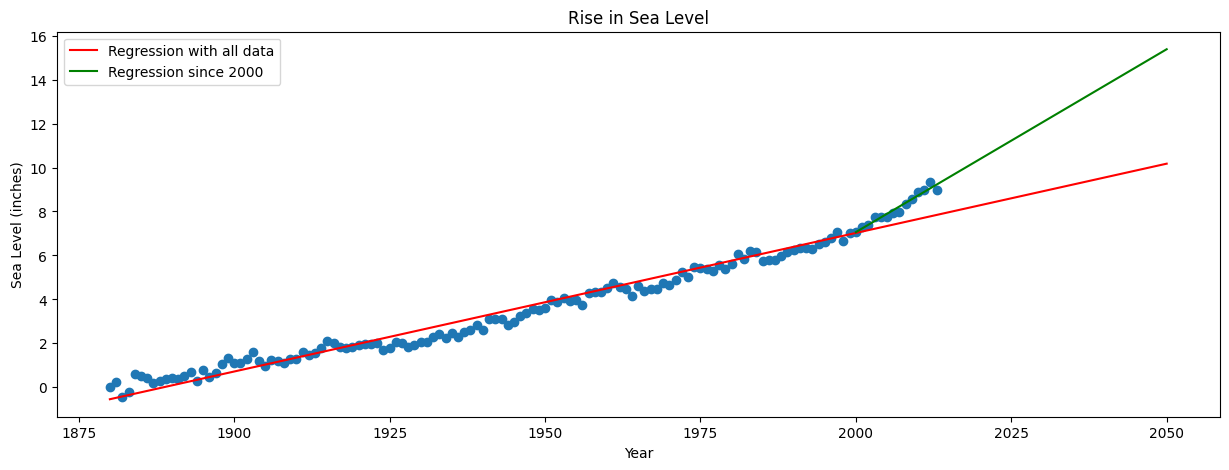

In [16]:
fig, sea1, sea2 = draw_plot()
print("Projection sea level 2050 (1880–2050):", sea1)
print("Projection sea level 2050 (2000–2050):", sea2)